# 제 7장 통계분석
#### [깃허브 주소](https://github.com/ADPclass/ADP_book_ver01/tree/main/%EC%A0%9C7%EC%9E%A5_%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D)
#### 가상환경에서 패키지 설치 방법
1. Anaconda Prompt (anaconda3) 접속
2. 가상환경 활성화 
    - activate <가상환경 이름(adp_code)>
3. 가상환경이 활성화된 상태에서 패키지 설치
    - pip install <패키지 이름>==<버전>

### t-test
#### 1. 일표본 T-검정

In [1]:
import pandas as pd
cats=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/cats.csv')
cats

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3
...,...,...,...
139,M,3.7,11.0
140,M,3.8,14.8
141,M,3.8,16.8
142,M,3.9,14.4


In [2]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     144 non-null    object 
 1   Bwt     144 non-null    float64
 2   Hwt     144 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


In [5]:
import scipy.stats as stats
from scipy.stats import shapiro
mu = 2.6
shapiro(cats['Bwt']) # 정규성을 만족하지 않으므로 윌콕슨 test 진행

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05)

In [6]:
stats.wilcoxon(cats.Bwt - mu, alternative='two-sided') # 0.05보다 작으므로 귀무가설 기각

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

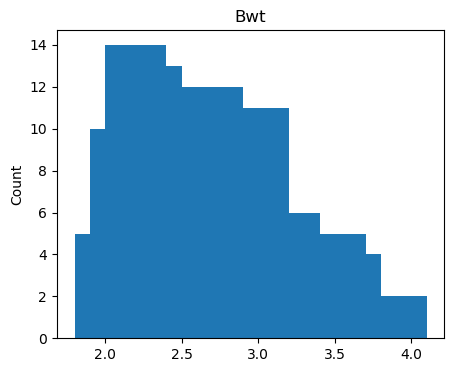

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
cats_Bwt_cnt = pd.value_counts(cats['Bwt'].values, sort=False)
width =0.4
plt.bar(cats_Bwt_cnt.index, cats_Bwt_cnt.values,width)
plt.title('Bwt')
plt.ylabel('Count');

#### 2. 대응표본 T-검정
- 귀무가설: 영양제 복용 전후, 수면시간에 차이 없다.
- 대립가설: 영양제 복용 전이 수면시간이 더 길다.

In [12]:
# 데이터 불러오기 및 확인 
import pandas as pd 
data = {'before':[7,3,4,5,2,1,6,6,5,4],
       'after':[8,4,5,6,2,3,6,8,6,5]}
data = pd.DataFrame(data)
data

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


In [13]:
stats.ttest_rel(data['after'], data['before'], alternative='greater') # 귀무가설 기각

Ttest_relResult(statistic=4.743416490252569, pvalue=0.0005269356285082765)

#### 3. 독립표본 T-검정

In [14]:
import pandas as pd
cats=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/cats.csv')

female = cats.loc[cats.Sex =='F', 'Bwt']
male = cats.loc[cats.Sex =='M', 'Bwt']
stats.levene(female, male) # 등분산 조건 만족 못 함

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

In [21]:
stats.ttest_ind(female, male, equal_var=False, alternative='two-sided') # 몸무게 차이 존재함.

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

In [22]:
print(female.mean())
print(male.mean())

2.359574468085107
2.8999999999999995


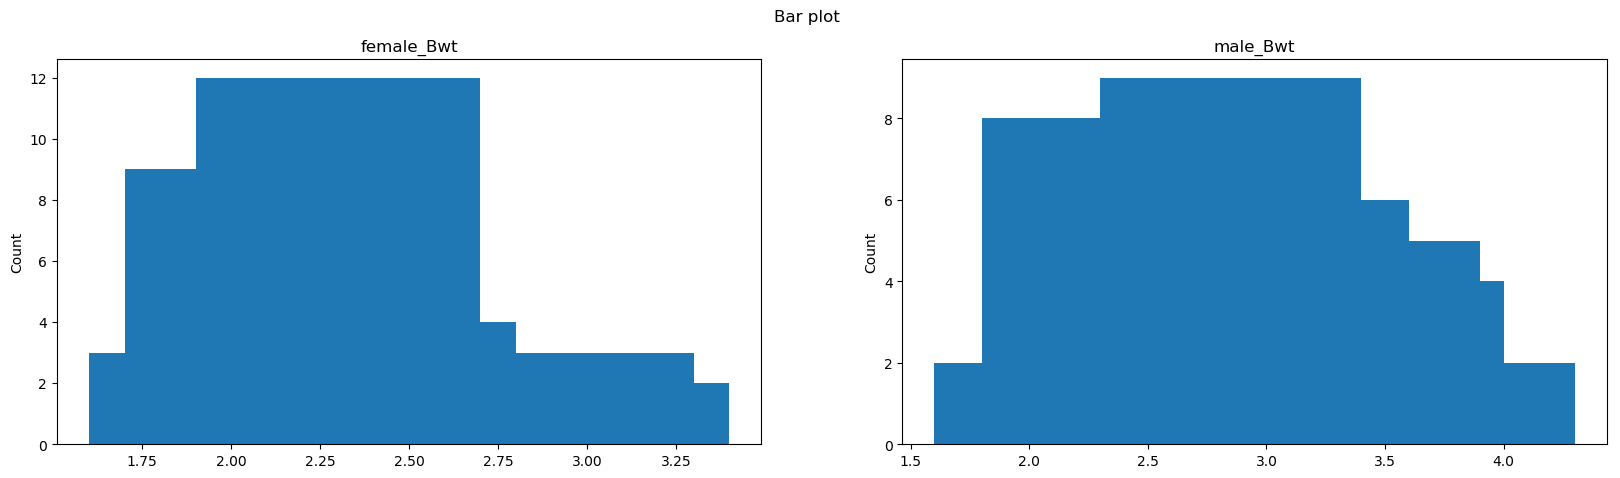

In [19]:
female_Bwt_cnt = pd.value_counts(female.values, sort=False)
male_Bwt_cnt = pd.value_counts(male.values, sort=False)
fig, axs = plt.subplots(1, 2,figsize=(20,5))
fig.suptitle('Bar plot')
width =0.4
axs[0].bar(female_Bwt_cnt.index, female_Bwt_cnt.values)
axs[0].set_title('female_Bwt')
axs[0].set_ylabel('Count')
axs[1].bar(male_Bwt_cnt.index, male_Bwt_cnt.values)
axs[1].set_title('male_Bwt')
axs[1].set_ylabel('Count')
plt.show()

### 분산분석
#### 1. 일원배치 분산분석

In [1]:
import scipy.stats as stats
import pandas as pd
iris = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/iris.csv')
iris.head(100)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [2]:
iris.target.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [3]:
iris.target.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: target, dtype: int64

In [4]:
target_list = iris.target.unique()
setosa = iris[iris.target == target_list[0]]['sepal width']
versicolor = iris[iris.target == target_list[1]]['sepal width']
virginica = iris[iris.target == target_list[2]]['sepal width']
print(target_list)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


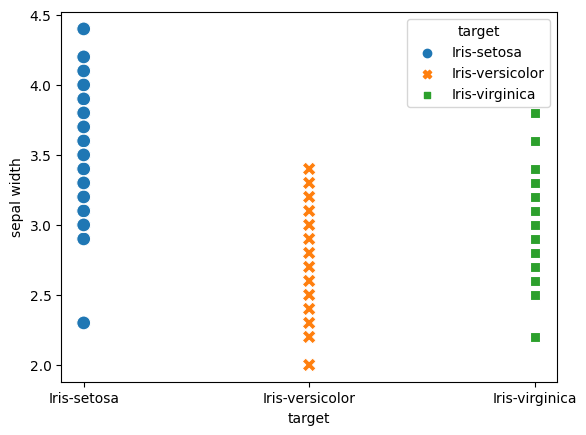

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x = 'target', y = 'sepal width', 
                    hue='target', 
                    style='target', # different shapes by group
                    s=100, 
                    data=iris)
plt.show()

In [6]:
# 정규성 검정 -> 모두 정규성을 만족함.
print(stats.shapiro(setosa))
print(stats.shapiro(versicolor))
print(stats.shapiro(virginica))

ShapiroResult(statistic=0.968691885471344, pvalue=0.20465604960918427)
ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507)
ShapiroResult(statistic=0.9673910140991211, pvalue=0.1809043288230896)


In [7]:
# 등분산성 검정 -> 만족함.
stats.levene(setosa, versicolor, virginica)

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

In [8]:
# 일원배치 분산분석 -> 귀무가설 기각
stats.f_oneway(setosa, versicolor, virginica)

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

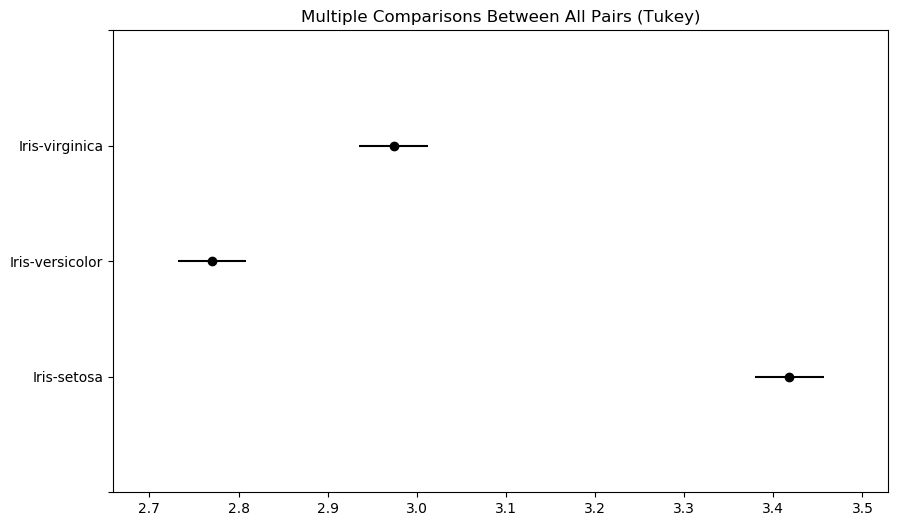

In [18]:
# 사후검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
mc = MultiComparison(data=iris['sepal width'], groups=iris.target) # MultiComparison: 다중 그룹 간의 통계적 차이를 검정하는 데 사용됨
tuekeyhsd = mc.tukeyhsd(alpha=.5)
fig = tuekeyhsd.plot_simultaneous() # plot_simultaneous: MultiComparison 객체에서 Tukey HSD 분석 결과를 시각화하는 메서드

In [19]:
tuekeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.0,-0.7246,-0.5714,True
Iris-setosa,Iris-virginica,-0.444,0.0,-0.5206,-0.3674,True
Iris-versicolor,Iris-virginica,0.204,0.009,0.1274,0.2806,True


In [20]:
# 정규성 만족 못할 때, 비모수(모집단의 특성을 고려하지 않음) 일원배치 분산분석
stats.kruskal(setosa, versicolor, virginica)

KruskalResult(statistic=62.49463010053111, pvalue=2.6882119006774528e-14)

In [10]:
# 등분산성 만족 못할 때 일원배치 분산분석
import pingouin as pg
pg.welch_anova(data=iris, dv='sepal width', between='target') # dv: 독립변수, between: 종속변수

,Source,ddof1,ddof2,F,p-unc,np2
0,target,2,97.369597,43.303381,3.519723e-14,0.391881


#### 2. 이원배치 분산분석

In [12]:
import pandas as pd
mtcars = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/mtcars.csv')
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [13]:
# cyl, am, mpg 변수들로만 구성된 분석용 데이터세트 생성
df = mtcars[['mpg', 'am', 'cyl']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   am      32 non-null     int64  
 2   cyl     32 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 896.0 bytes


In [15]:
# 분산분석 수행
# typ=1: 독립 변수의 순서에 따라 설명 변수의 효과를 평가함, 독립 변수를 추가하는 순서에 따라 설명 변수 간의 상호작용이 발생함.
# typ=2: 독립 변수의 순서에 관계없이 각 독립 변수의 효과를 개별적으로 평가함, 각 독립 변수의 효과를 개별적으로 해석하는 데 유용함
# typ=3: 다른 모든 설명 변수가 이미 모델에 포함된 상태에서 각 독립 변수의 효과를 평가함
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = 'mpg ~ C(cyl) + C(am) + C(cyl):C(am)'
model = ols(formula, df).fit()
aov_table = anova_lm(model, typ=2) 
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(cyl),2.0,824.784590,412.392295,44.851657,3.725274e-09
C(am),1.0,36.766919,36.766919,3.998759,5.608373e-02
C(cyl):C(am),2.0,25.436511,12.718256,1.383233,2.686140e-01
Residual,26.0,239.059167,9.194583,NaN,NaN


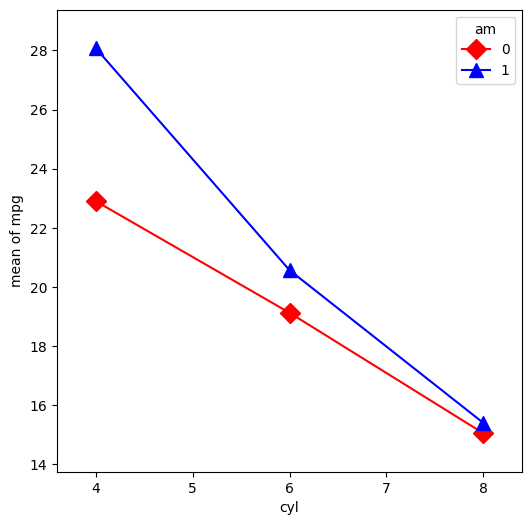

In [18]:
# 교호작용 효과에 대한 시각화
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

# 독립변수 cyl, am와 종속변수 mgp를 Series로 변경
cyl = df['cyl']
am = df['am']
mpg = df['mpg']
fig, ax = plt.subplots(figsize=(6,6))
fig = interaction_plot(cyl, am, mpg,          # x1, x2, y 순서대로 작성!
                      colors=['red', 'blue'],
                      markers=['D', '^'],
                      ms=10, ax=ax);

### 카이제곱 검정
#### 1. 적합성 검정
- 귀무가설: 타이타닉호의 생존자 중 남성, 여성의 비율은 각각 50%이다.
- 대립가설: 타이타닉호의 생존자 중 남성, 여성의 비율은 각각 50%라고 할 수 없다.

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   adult_male   891 non-null    bool   
 10  embark_town  889 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 70.6+ KB


In [4]:
# 생존자 중 성별 빈도수 확인
df_t = df[df['survived']==1]
table = df_t[['sex']].value_counts()
table

sex   
female    233
male      109
dtype: int64

In [11]:
# 유의수준 0.05로 적합도 검정 수행
from scipy.stats import chisquare
chi = chisquare(table, f_exp=[171, 171]) # f_exp: 각 카테고리의 기대빈도(default=가능성이 동일하다고 가정)
print('<적합도 검정>\n', chi)

<적합도 검정>
 Power_divergenceResult(statistic=44.95906432748538, pvalue=2.0119672574477235e-11)


#### 2. 독립성 검정
- 귀무가설: class 변수와 survived 변수는 서로 독립이다.
- 대립가설: 두 변수는 서로 독립이 아니다.

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/titanic.csv')
table = pd.crosstab(df['class'], df['survived'])
table

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


In [18]:
from scipy.stats import chi2_contingency
chi, p, df, expect = chi2_contingency(table)
print('statistic:', chi)
print('p-value:', p)
print('df:', df)
print('expect: \n', expect)

statistic: 102.88898875696056
p-value: 4.549251711298793e-23
df: 2
expect: 
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


#### 3. 동질성 검정
- 독립성 검정과 같은 방식

### 선형 회귀분석
#### 1. 단순 선형 회귀분석

In [23]:
import pandas as pd
import numpy as np
house = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/kc_house_data.csv')
house = house[['price', 'sqft_living']]

# 독립변수와 종속변수의 선형 가정
house.corr() # 서로 양의 상관성이 존재함.(0.702)

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


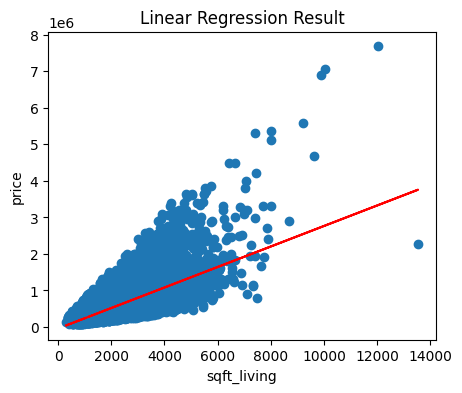

In [27]:
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

# 변수 할당
X = house['sqft_living']
y = house['price']

# 단순 선형 회귀 모형 적합
lr = ols('price ~ sqft_living', data=house).fit()
y_pred = lr.predict(X)

# 시각화
plt.figure(figsize=(5,4))
plt.scatter(X,y ) # 원 데이터 산포도
plt.plot(X, y_pred, color='red') # 추정된 회귀식
plt.xlabel('sqft_living', fontsize=10)
plt.ylabel('price', fontsize=10)
plt.title('Linear Regression Result')
plt.show()

 직선이 모든 데이터를 잘 설명하지 못하고 있는 것으르며 보임.  
 오차 또한 원점에서 멀어질수록 분산이 커지는 특정한 패턴을 보이므로 단순 회귀분석으로는 데이터를 충분히 설명하지 못함.

In [28]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Thu, 01 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:15:23   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# 회귀계수 출력
lr.params

Intercept     -43580.743094
sqft_living      280.623568
dtype: float64

#### 2. 다중 선형 회귀분석

In [33]:
cars = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/Cars93.csv')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [39]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# ols 모델의 formula를 정의할 때 일부 특수문자는 쓸 수 없기에, 컬럼 특수문자 제거
cars.columns = cars.columns.str.replace(".", "")
model = smf.ols(formula = 'Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway', data=cars)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     19.14
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           4.88e-14
Time:                        14:25:58   Log-Likelihood:                -302.94
No. Observations:                  93   AIC:                             619.9
Df Residuals:                      86   BIC:                             637.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.2157     17.812     -1.809      0.074     -67.625       3.193
EngineSize     4.4732      1.410      3.172      0.002       1.670       7.276
RPM            0.0071      0.001      5.138      0.000       0.004       0.010
Weight         0.0056      0.003      1.634      0.106      -0.001       0.012
Length        -0.0464      0.094     -0.496      0.621      -0.232       0.139
MPGcity       -0.3478      0.448     -0.776      0.440      -1.239       0.544
MPGhighway     0.0582      0.460      0.126      0.900      -0.856       0.973
==============================================================================
Omnibus:                       62.984   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.289
Skew:                           2.074   Prob(JB):                     5.89e-84
Kurtosis:                      12.039   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
# 다중공선성 파악
cars[['EngineSize','RPM' , 'Weight','Length','MPGcity','MPGhighway']].corr()

,EngineSize,RPM,Weight,Length,MPGcity,MPGhighway
EngineSize,1.000000,-0.547898,0.845075,0.780283,-0.710003,-0.626795
RPM,-0.547898,1.000000,-0.427931,-0.441249,0.363045,0.313469
Weight,0.845075,-0.427931,1.000000,0.806274,-0.843139,-0.810658
Length,0.780283,-0.441249,0.806274,1.000000,-0.666239,-0.542897
MPGcity,-0.710003,0.363045,-0.843139,-0.666239,1.000000,0.943936
MPGhighway,-0.626795,0.313469,-0.810658,-0.542897,0.943936,1.000000


In [41]:
# VIF 구하기
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway',
                data=cars, return_type='dataframe') # 독립변수와 종속변수를 데이터프레임으로 나누어 저장하는 함수

# 독립변수끼리의 vif 값을 계산하여 데이터프레임으로 만드는 과정
vif_lst = []
for i in range(1, len(X.columns)):
    vif_lst.append([variance_inflation_factor(X.values, i), X.columns[i]])
pd.DataFrame(vif_lst, columns=['vif', 'variable'])

,vif,variable
0,4.605118,EngineSize
1,1.446859,RPM
2,8.685973,Weight
3,4.013002,Length
4,13.668288,MPGcity
5,12.943133,MPGhighway


In [44]:
y

,Price
0,15.9
1,33.9
2,29.1
3,37.7
4,30.0
...,...
88,19.7
89,20.0
90,23.3
91,22.7


In [42]:
model = smf.ols(formula = 'Price ~ EngineSize + RPM + Weight + Length + MPGcity', data=cars)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     23.22
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           9.60e-15
Time:                        14:31:39   Log-Likelihood:                -302.95
No. Observations:                  93   AIC:                             617.9
Df Residuals:                      87   BIC:                             633.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.1513     17.704     -1.816      0.073     -67.339       3.037
EngineSize     4.5082      1.375      3.279      0.001       1.776       7.241
RPM            0.0071      0.001      5.176      0.000       0.004       0.010
Weight         0.0054      0.003      1.766      0.081      -0.001       0.011
Length        -0.0410      0.083     -0.495      0.622      -0.206       0.124
MPGcity       -0.2988      0.225     -1.331      0.187      -0.745       0.148
==============================================================================
Omnibus:                       62.828   Durbin-Watson:                   1.439
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              381.157
Skew:                           2.069   Prob(JB):                     1.71e-83
Kurtosis:                      12.013   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
import time
import itertools
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
# 전진선택법
def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['Intercept']) if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y,            feature_set=predictors+[p]+['Intercept']))
        
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in")
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [46]:
# 후진소거법
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) -1):
        results.append(processSubset(X=X, y= y,        feature_set = list(combo)+['Intercept']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on",          len(predictors) -1, "predictors in", (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,         'AIC:',best_model[0] )

    return best_model

In [47]:
# 단계적 선택법
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['Intercept'])['AIC']

    for i in range(1, len(X.columns.difference(['Intercept'])) +1):
        Forward_result = forward(X=X, y=y, predictors=predictors) 
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k !='Intercept']
        Backward_result = backward(X=X, y=y, predictors=predictors)

        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k !='Intercept']
            print('backward')

        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return (Stepmodels['model'][len(Stepmodels['model'])])

In [48]:
# 단계적 선택법
Stepwise_best_model = Stepwise_model(X=X, y=y)

Processed  6 models on 1 predictors in
Selected predictors: ['Weight', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001BD522D3908>
forward
Processed  1 models on 0 predictors in 0.002992868423461914
Selected predictors: ['Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001BD522930C8>
Processed  5 models on 2 predictors in
Selected predictors: ['Weight', 'RPM', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001BD522D6A08>
forward
Processed  2 models on 1 predictors in 0.007709980010986328
Selected predictors: ['Weight', 'Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001BD522D3C88>
Processed  4 models on 3 predictors in
Selected predictors: ['Weight', 'RPM', 'EngineSize', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001BD522D3208>
forward
Processe

In [49]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     37.98
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           6.75e-16
Time:                        14:39:25   Log-Likelihood:                -304.05
No. Observations:                  93   AIC:                             616.1
Df Residuals:                      89   BIC:                             626.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.0073      0.002      3.372      0.001       0.003       0.012
RPM            0.0071      0.001      5.208      0.000       0.004       0.010
EngineSize     4.3054      1.325      3.249      0.002       1.673       6.938
Intercept    -51.7933      9.106     -5.688      0.000     -69.887     -33.699
==============================================================================
Omnibus:                       62.441   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.880
Skew:                           2.076   Prob(JB):                     2.62e-79
Kurtosis:                      11.726   Cond. No.                     8.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 군집분석
#### 1. 계층적 군집분석

In [2]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

us = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/USArrests.csv')

us.columns = ['State', 'Murder', 'Assault', 'UrbanPop', 'Rape']
labellist = us.State.tolist()
us.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


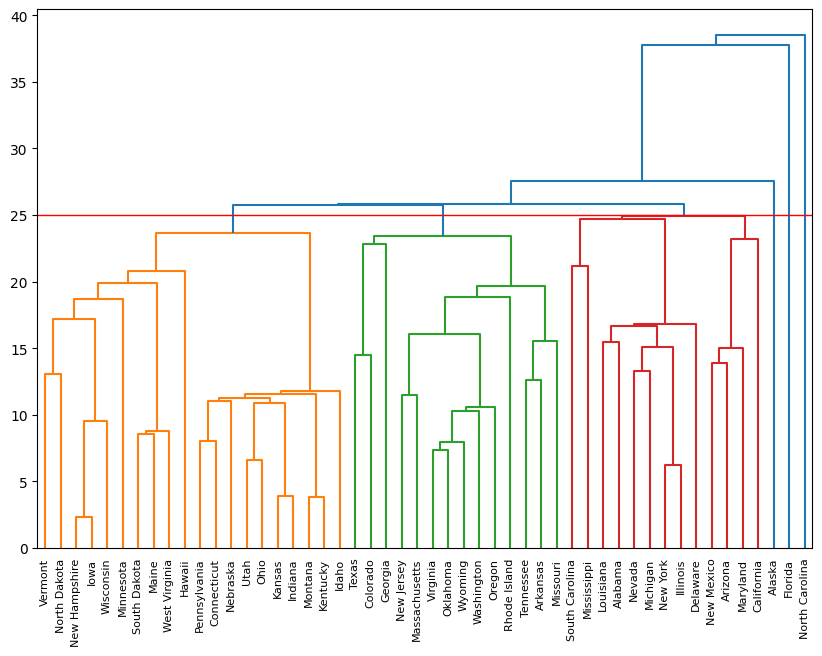

In [11]:
# 최단 연결법
single = linkage(us.iloc[:, 1:], metric='euclidean', method='single')

# 덴드로그램 그리기
plt.figure(figsize=(10, 7))
dendrogram(single, orientation='top', labels=labellist,
          distance_sort='descending', color_threshold=25, show_leaf_counts=True)

plt.axhline(y=25, color='r', linewidth=1)
plt.show()

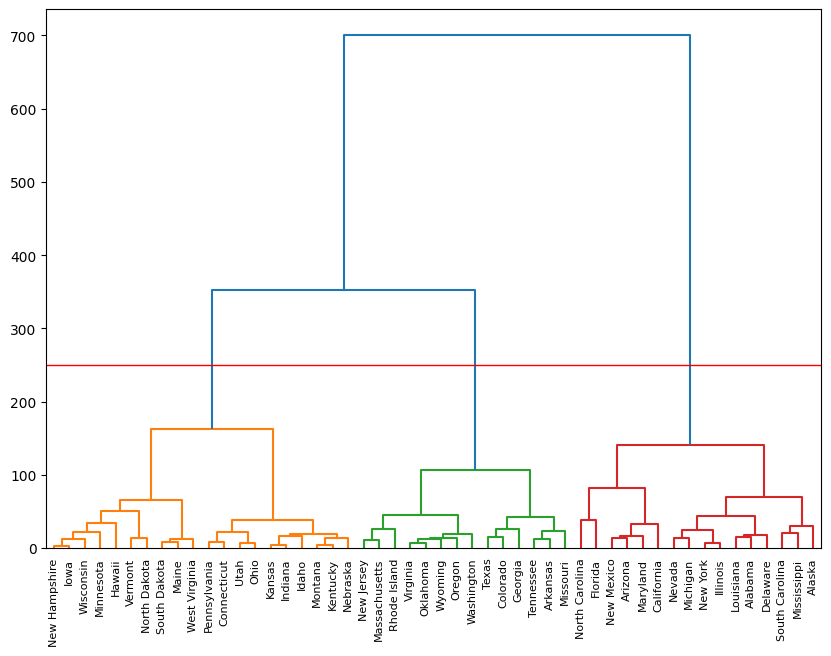

In [20]:
# 와드 연결법
ward = linkage(us.iloc[:, 1:], metric='euclidean', method='ward')

# 덴드로그램 그리기
plt.figure(figsize=(10,7))
dendrogram(ward, orientation='top', labels=labellist, distance_sort='descending', color_threshold=250, show_leaf_counts=True)
plt.axhline(y=250, color='r', linewidth=1)
plt.show()

In [21]:
# state마다 어떤 군집에 설정되었는지 확인
assignemts = fcluster(ward, 250, 'distance')
assignemts

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [22]:
us['cluster'] = assignemts
us.groupby('cluster').mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857
3,4.270000,87.550000,59.750000,14.390000


#### 2. 비계층적 군집분석_K-Means 

In [25]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

iris = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/iris.csv')
X = iris.drop('target', axis=1)
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
# 클러스터별 콜린스키 하라바츠 결과 비교
from sklearn.metrics import calinski_harabasz_score
for k in range(2, 10):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    print(calinski_harabasz_score(X, labels))

513.3038433517568
560.3999242466402
529.3982941434156
493.797689822402
474.85419152314864
449.23727032407174
435.6588533945912
403.43595475014206


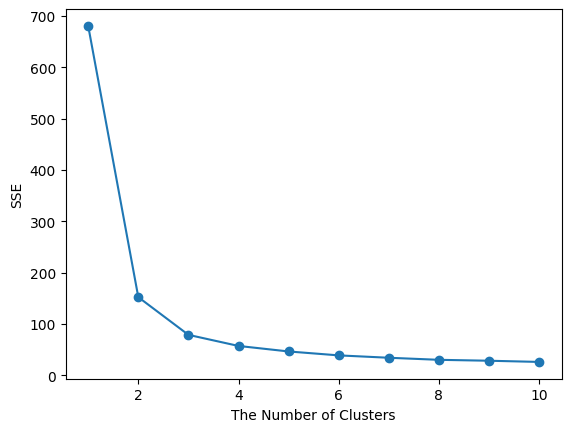

[680.8243999999996, 152.36870647733915, 78.94084142614601, 57.317873214285726, 46.56163015873017, 38.930963049671746, 34.299985543844244, 30.290983238178892, 28.4983205272988, 26.185759370015955]


In [30]:
def elbow(X):
    sse=[]
    for i in range(1,11):
        km=KMeans(n_clusters=i, random_state=1)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)
    
elbow(X)

In [31]:
# 최적의 k로 K-Means 군집화 실행
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

# 할당된 군집을 iris 데이터에 추가
new_labels =km.labels_
iris['cluster'] = new_labels

iris.groupby(['cluster']).mean()

,sepal length,sepal width,petal length,petal width
cluster,,,,
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.418000,1.464000,0.244000
2,6.850000,3.073684,5.742105,2.071053


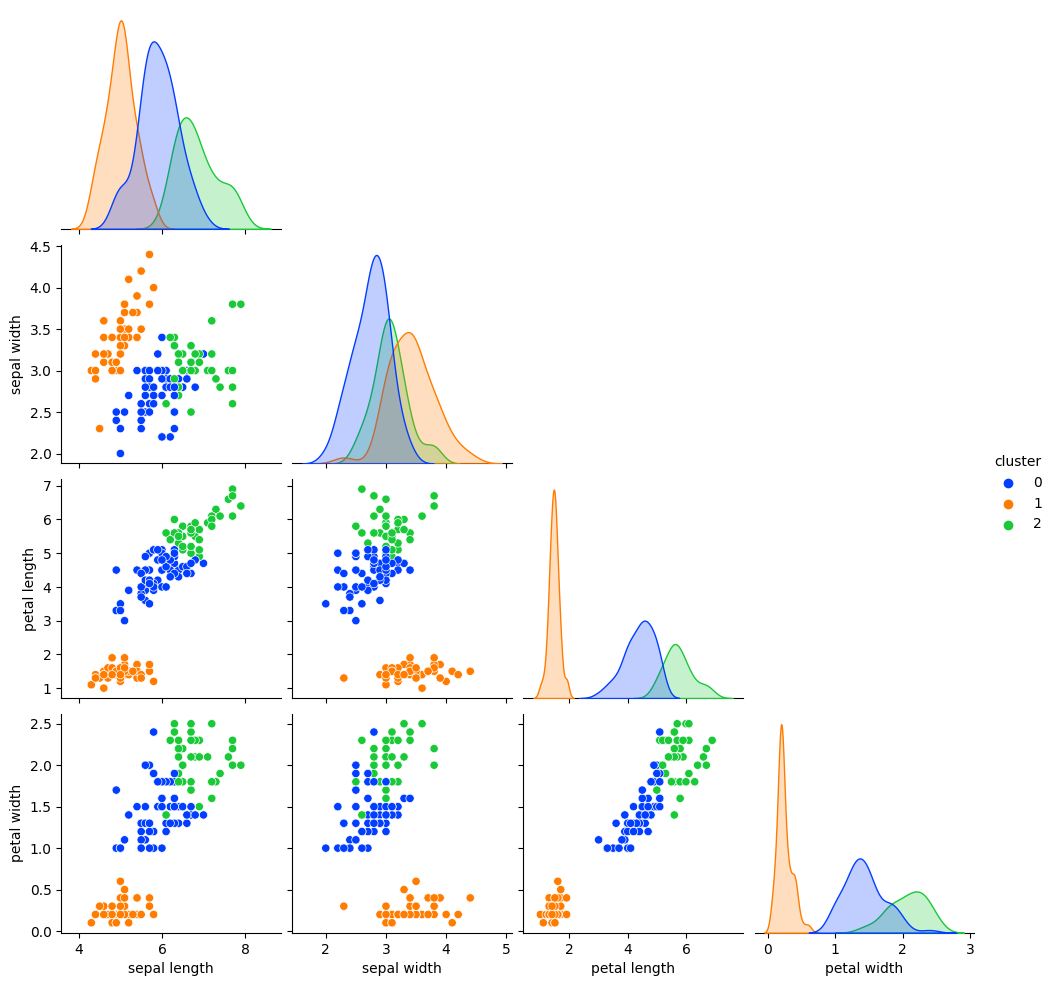

In [34]:
# k-means 시각화
# 군집결과 시각화
import seaborn as sns
sns.pairplot(iris, diag_kind='kde', hue='cluster', corner=True, palette='bright')
plt.show()

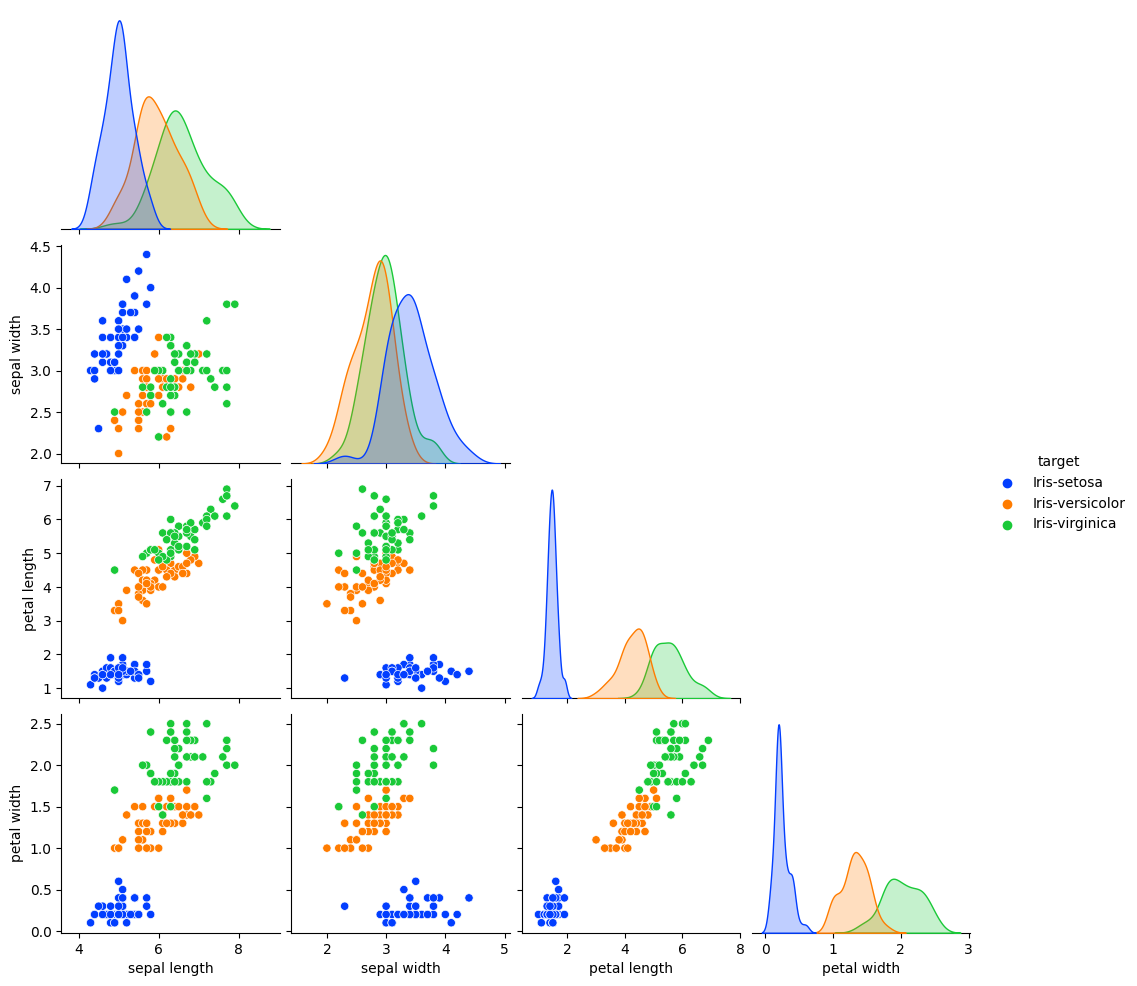

In [35]:
# 원본 데이터 iris target 시각화
sns.pairplot(iris.drop(columns=['cluster']), diag_kind='kde', hue='target', corner=True, palette='bright')
plt.show()

#### 2. 비계층적 군집분석_혼합분포 군집분석

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# 데이터 업로드
iris = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/iris.csv')
df = iris.drop('target', axis=1)

# 데이터 스케일링
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# 가우시안 혼합모델 구축
gmm = GaussianMixture(n_components=3)
gmm.fit(df_scaled)
gmm_labels = gmm.predict(df_scaled)
gmm_labels

C:\Users\user\anaconda3\envs\adp_code\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\user\anaconda3\envs\adp_code\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\user\anaconda3\envs\adp_code\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\user\anaconda3\envs\adp_code\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [3]:
df['gmm_cluster'] = gmm_labels

# 군집의 변수별 통계량 확인
cluster=[0,1,2]
df.groupby('gmm_cluster').mean()

,sepal length,sepal width,petal length,petal width
gmm_cluster,,,,
0,6.554545,2.950909,5.489091,1.989091
1,5.006000,3.418000,1.464000,0.244000
2,5.904444,2.775556,4.193333,1.293333


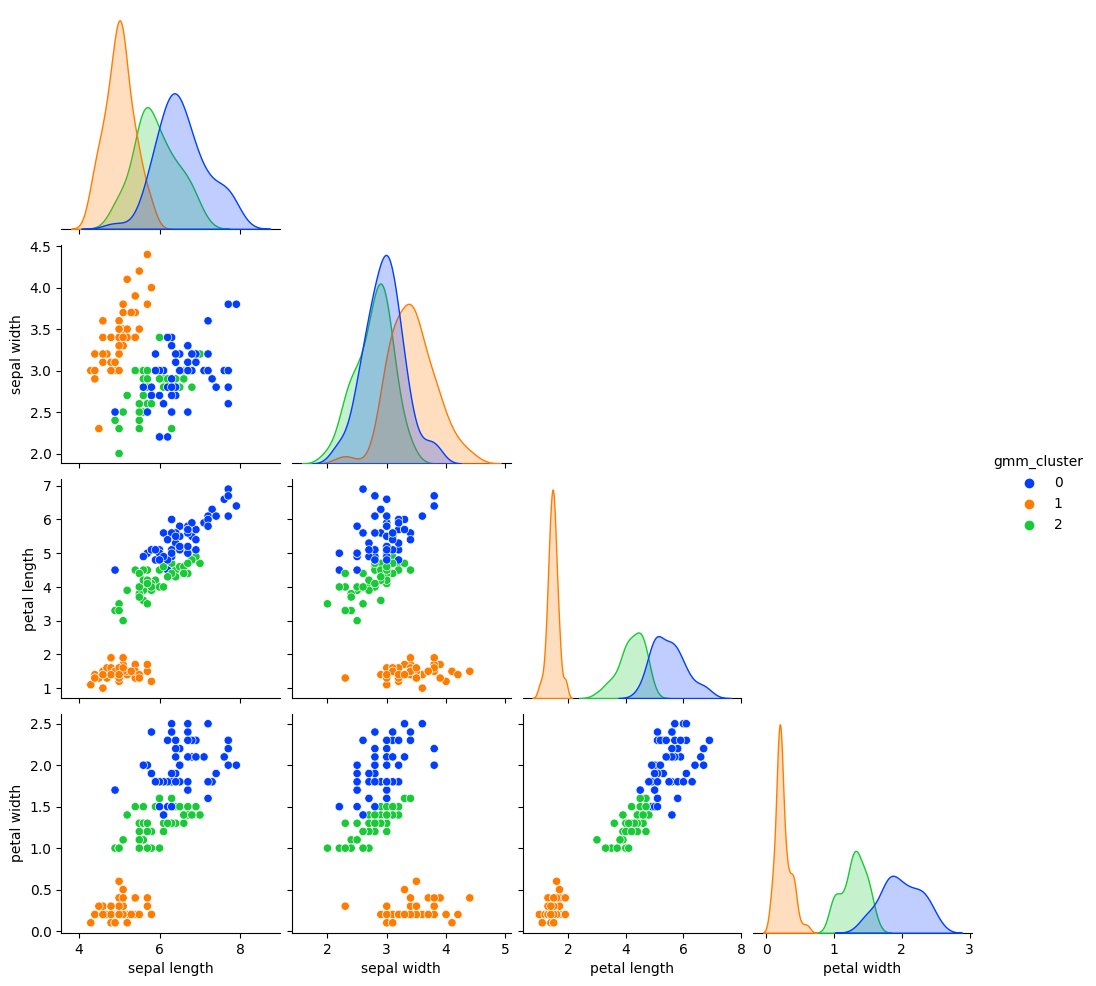

In [4]:
import seaborn as sns
sns.pairplot(df, diag_kind='kde', hue='gmm_cluster', corner=True, palette='bright')
plt.show()

### 연관분석
#### 1. Run-Test

In [1]:
import pandas as pd 
data = ['a','a','b','b','a','a','a','a','b','b','b','b','b','a','a','b','b','a','b','b']
test_df = pd.DataFrame(data, columns=["product"])
test_df.head()

,product
0,a
1,a
2,b
3,b
4,a


In [3]:
from statsmodels.sandbox.stats.runs import runstest_1samp

# Run-test를 위한 데이터 변환
test_df.loc[test_df['product']=='a', 'product'] = 1
test_df.loc[test_df['product']=='b', 'product'] = 0

# perform Runs test
# run-test의 귀무가설: 연속적인 관측값이 임의적이다.
# run-test의 대립가설: 연속적인 관측값이 임의적이 아니다(즉 연관이 있다).
runstest_1samp(test_df['product'], cutoff=.5, correction=True)

(-1.1144881152070183, 0.26506984027306035)

#### 2. 연관규칙분석

In [2]:
# 데이터세트를 트랜잭션 형태로 변경
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
dataset = [['Apple', 'Beer', 'Rice', 'Chicken'],
           ['Apple', 'Beer', 'Rice'],
           ['Apple', 'Beer'],
           ['Apple', 'Bananas'],
           ['Milk', 'Beer', 'Rice', 'Chicken'],
           ['Milk', 'Beer', 'Rice'],
           ['Milk', 'Beer'],
           ['Apple', 'Bananas']]
te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
print(te.columns_)
te_ary

['Apple', 'Bananas', 'Beer', 'Chicken', 'Milk', 'Rice']


array([[ True, False,  True,  True, False,  True],
       [ True, False,  True, False, False,  True],
       [ True, False,  True, False, False, False],
       [ True,  True, False, False, False, False],
       [False, False,  True,  True,  True,  True],
       [False, False,  True, False,  True,  True],
       [False, False,  True, False,  True, False],
       [ True,  True, False, False, False, False]])

In [3]:
# 트랜잭션 형태를 데이터프레임으로 변경
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Bananas,Beer,Chicken,Milk,Rice
0,True,False,True,True,False,True
1,True,False,True,False,False,True
2,True,False,True,False,False,False
3,True,True,False,False,False,False
4,False,False,True,True,True,True
5,False,False,True,False,True,True
6,False,False,True,False,True,False
7,True,True,False,False,False,False


In [5]:
# 지지도 60% 이상인 품목만 추출
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=.6, use_colnames=True)

,support,itemsets
0,0.625,(Apple)
1,0.750,(Beer)


In [6]:
# 최소지지도 0.3 이상인 규칙만 추출 + 규칙 길이 파악
frequent_itemsets = apriori(df, min_support=.3, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.625,(Apple),1
1,0.750,(Beer),1
2,0.375,(Milk),1
3,0.500,(Rice),1
4,0.375,"(Beer, Apple)",2
5,0.375,"(Beer, Milk)",2
6,0.500,"(Beer, Rice)",2


In [10]:
# 다른 데이터세트
df = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/groceries.csv')
df

,"citrus fruit,semi-finished bread,margarine,ready soups"
0,"tropical fruit,yogurt,coffee"
1,whole milk
2,"pip fruit,yogurt,cream cheese,meat spreads"
3,"other vegetables,whole milk,condensed milk,lon..."
4,"whole milk,butter,yogurt,rice,abrasive cleaner"
...,...
9829,"sausage,chicken,beef,hamburger meat,citrus fru..."
9830,cooking chocolate
9831,"chicken,citrus fruit,other vegetables,butter,y..."
9832,"semi-finished bread,bottled water,soda,bottled..."


In [17]:
# 전처리
df_split = df.iloc[:, 0].str.split(',', expand=True) # expand=True:  열의 개수는 분할된 요소의 최대 개수에 따라 자동으로 결정(None 값 발생)
df_split.values

array([['tropical fruit', 'yogurt', 'coffee', ..., None, None, None],
       ['whole milk', None, None, ..., None, None, None],
       ['pip fruit', 'yogurt', 'cream cheese', ..., None, None, None],
       ...,
       ['chicken', 'citrus fruit', 'other vegetables', ..., None, None,
        None],
       ['semi-finished bread', 'bottled water', 'soda', ..., None, None,
        None],
       ['chicken', 'tropical fruit', 'other vegetables', ..., None, None,
        None]], dtype=object)

In [15]:
# None을 지우고 트랜잭션 형태로 변경
df_split_aray = df_split.values
groceries=[]
for i in range(len(df_split_aray)):
    temp = list(filter(None, df_split_aray[i])) # df_split_array[i]에서 값이 None이 아닌 요소들로 구성된 새로운 리스트를 반환
    groceries.append(temp)
    
groceries

[['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk', 'pastry'],
 ['whole milk'],
 ['tropical fruit',
  'cream cheese',

In [18]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
groceries_tr = te.fit_transform(groceries)
groceries_tr = pd.DataFrame(groceries_tr, columns=te.columns_)
groceries_tr

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9829,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9830,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
from mlxtend.frequent_patterns import apriori

# 지지도가 1% 이상인 빈번항목집합 선택
groceries_ap = apriori(groceries_tr, min_support=.01, use_colnames=True)
groceries_ap

,support,itemsets
0,0.033455,(UHT-milk)
1,0.017694,(baking powder)
2,0.052471,(beef)
3,0.033252,(berries)
4,0.026032,(beverages)
...,...,...
328,0.011999,"(tropical fruit, root vegetables, whole milk)"
329,0.014541,"(yogurt, root vegetables, whole milk)"
330,0.010474,"(yogurt, whole milk, soda)"
331,0.015152,"(tropical fruit, yogurt, whole milk)"


In [24]:
from mlxtend.frequent_patterns import association_rules

# 신뢰도가 0.3 이상인 빈번항목집합 탐색
association_rules(groceries_ap, metric='confidence', min_threshold=.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(other vegetables),0.052471,0.193512,0.019727,0.375969,1.942869,0.009574,1.292384
1,(beef),(root vegetables),0.052471,0.109010,0.017389,0.331395,3.040058,0.011669,1.332612
2,(beef),(whole milk),0.052471,0.255542,0.021253,0.405039,1.585018,0.007844,1.251271
3,(berries),(other vegetables),0.033252,0.193512,0.010270,0.308869,1.596118,0.003836,1.166909
4,(berries),(whole milk),0.033252,0.255542,0.011796,0.354740,1.388187,0.003299,1.153733
...,...,...,...,...,...,...,...,...,...
120,"(yogurt, soda)",(whole milk),0.027354,0.255542,0.010474,0.382900,1.498382,0.003484,1.206381
121,"(tropical fruit, yogurt)",(whole milk),0.029286,0.255542,0.015152,0.517361,2.024564,0.007668,1.542474
122,"(tropical fruit, whole milk)",(yogurt),0.042302,0.139516,0.015152,0.358173,2.567255,0.009250,1.340679
123,"(whipped/sour cream, yogurt)",(whole milk),0.020744,0.255542,0.010881,0.524510,2.052539,0.005580,1.565664


In [28]:
rules = association_rules(groceries_ap, metric='lift', min_threshold=1)

# 규칙의 길이 컬럼 생성
rules['antecedent_len'] = rules['antecedents'].apply(lambda x: len(x))
rules[ (rules['antecedent_len'] >= 2) &
     (rules['confidence'] >= .4) &
     (rules['lift'] >= 3)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
420,"(root vegetables, citrus fruit)",(other vegetables),0.017694,0.193512,0.010372,0.586207,3.029300,0.006948,1.949012,2
491,"(tropical fruit, root vegetables)",(other vegetables),0.021049,0.193512,0.012304,0.584541,3.020692,0.008231,1.941197,2
